In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving gld.csv to gld.csv
User uploaded file "gld.csv" with length 49253 bytes


In [ ]:
df = pd.read_csv('gld.csv')

In [ ]:
df.Gold_Price = df.Gold_Price.str.split(' ',expand=True).iloc[:,0]

In [ ]:
df.head()

,Date,Gold_Price
0,30-09-2022,4349.7
1,29-09-2022,4341.5
2,28-09-2022,4335.8
3,27-09-2022,4269
4,26-09-2022,4255.4


In [ ]:
df.tail()

,Date,Gold_Price
2215,7/1/2016,2369.5
2216,6/1/2016,2329.8
2217,5/1/2016,2301.3
2218,4/1/2016,2299.8
2219,1/1/2016,2252.6


In [ ]:
df2 = df.Date.str.split('-',expand=True).dropna().append(df.Date.str.split('/',expand=True).dropna()).iloc[:,[2,1,0]]

In [ ]:
df2.columns = ['Year', 'Month', 'Day']

In [ ]:
df3 = df2.sort_index()

In [ ]:
df3 = df3.assign(Date_format = lambda x: x['Year']+'-'+x['Month']+'-'+ x['Day']).drop(['Year', 'Month', 'Day'], axis = 1)

In [ ]:
df4 = df.merge(df3,left_index=True,right_index=True)

In [ ]:
df4 = df4.loc[:, ['Date_format','Gold_Price']]

In [ ]:
df5 = df4.sort_index( ascending=False)

In [ ]:
df5.Gold_Price = df5.Gold_Price.astype(float)

In [ ]:
gp = df5.Gold_Price.values

In [ ]:
gp = gp.reshape(len(df5),1)

In [ ]:
gp_t = gp[:len(df5)-30]

In [ ]:
gp_tst = gp[len(df5)-30:]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))

In [ ]:
training_set_scaled = sc.fit_transform(gp_t)

In [ ]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
test_set_scaled = sc.transform(gp_tst)

In [ ]:
X_train.shape,y_train.shape

((2130, 60), (2130,))

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [ ]:
# Part -2 - Building the RNN
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import RNN,LSTM
from keras.layers import Dropout

In [ ]:
!pip install --upgrade keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
regressor = Sequential()

regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (X_train.shape[1],1)))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.5))

regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units =1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [ ]:
regressor.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 50)            10400     
                                                                 
 lstm_3 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_2 (Dropout)         (None, 50)               

In [ ]:
regressor.fit(X_train,y_train,epochs = 500, batch_size = 32)

Epoch 1/500
67/67 [==============================] - 1s 14ms/step - loss: 8.7686e-04 - accuracy: 4.6948e-04
Epoch 2/500
67/67 [==============================] - 1s 13ms/step - loss: 9.1760e-04 - accuracy: 4.6948e-04
Epoch 3/500
67/67 [==============================] - 1s 13ms/step - loss: 8.6261e-04 - accuracy: 4.6948e-04
Epoch 4/500
67/67 [==============================] - 1s 13ms/step - loss: 8.1639e-04 - accuracy: 4.6948e-04
Epoch 5/500
67/67 [==============================] - 1s 13ms/step - loss: 8.2033e-04 - accuracy: 4.6948e-04
Epoch 6/500
67/67 [==============================] - 1s 13ms/step - loss: 9.6407e-04 - accuracy: 4.6948e-04
Epoch 7/500
67/67 [==============================] - 1s 13ms/step - loss: 8.8172e-04 - accuracy: 4.6948e-04
Epoch 8/500
67/67 [==============================] - 1s 13ms/step - loss: 8.6613e-04 - accuracy: 4.6948e-04
Epoch 9/500
67/67 [==============================] - 1s 13ms/step - loss: 8.3253e-04 - accuracy: 4.6948e-04
Epoch 10/500
67/67 [========

In [ ]:
len(test_set_scaled)

30

In [ ]:
inputs = gp[len(gp_t) - len(gp_tst) - 60:]

In [ ]:
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [ ]:
X_test = []
for i in range(60, 120):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
gp_t

array([[2252.6],
       [2299.8],
       [2301.3],
       ...,
       [4460. ],
       [4408.5],
       [4364.9]])

In [ ]:
predicted_stock_price

array([[4455.2876],
       [4411.323 ],
       [4439.715 ],
       [4500.477 ],
       [4489.22  ],
       [4487.684 ],
       [4484.726 ],
       [4529.195 ],
       [4528.663 ],
       [4496.501 ],
       [4518.5435],
       [4542.5845],
       [4543.159 ],
       [4538.2666],
       [4499.9146],
       [4468.2466],
       [4431.5376],
       [4439.56  ],
       [4424.278 ],
       [4426.4756],
       [4426.669 ],
       [4409.025 ],
       [4432.5474],
       [4433.6626],
       [4456.939 ],
       [4415.1323],
       [4423.4243],
       [4414.7075],
       [4419.118 ],
       [4375.6   ],
       [4342.1655],
       [4320.406 ],
       [4353.1177],
       [4356.314 ],
       [4363.291 ],
       [4359.0366],
       [4344.155 ],
       [4368.794 ],
       [4348.7803],
       [4369.034 ],
       [4363.1157],
       [4368.5835],
       [4375.0967],
       [4336.2036],
       [4315.917 ],
       [4256.966 ],
       [4273.5073],
       [4273.0566],
       [4280.5356],
       [4277.1987],


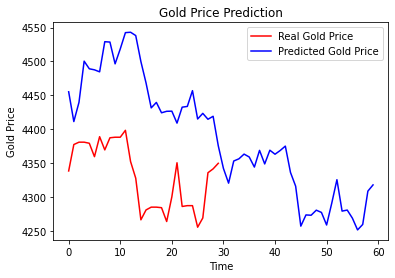

In [ ]:
# Visualising the results
plt.plot(gp_tst, color = 'red', label = 'Real Gold Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Gold Price')
plt.title('Gold Price Prediction')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.savefig('Gold.png')

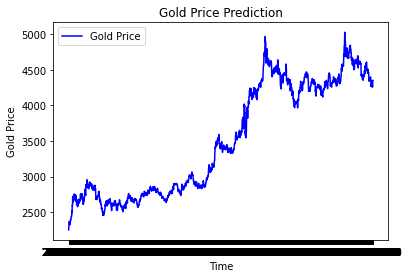

In [ ]:
# Visualising the results
#plt.plot(gp_tst, color = 'red', label = 'Real Gold Price')
plt.plot(df5.Date_format, df5.Gold_Price, color = 'blue', label = 'Gold Price')
plt.title('Gold Price ')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
#plt.savefig('Gold.png')

In [ ]:
df7 = df.merge(df2,left_index=True,right_index=True)

In [ ]:
df7.Gold_Price = df7.Gold_Price.astype(float)

In [ ]:
df8 = df7.groupby('Year').aggregate(np.average)

/usr/local/lib/python3.7/dist-packages/pandas/core/groupby/generic.py:303: FutureWarning: Dropping invalid columns in SeriesGroupBy.agg is deprecated. In a future version, a TypeError will be raised. Before calling .agg, select only columns which should be valid for the aggregating function.
  results[key] = self.aggregate(func)


In [ ]:
df8.index

Index(['2016', '2017', '2018', '2019', '2020', '2021', '2022'], dtype='object', name='Year')

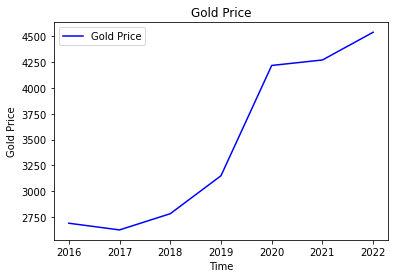

In [ ]:
plt.plot(df8.index,df8.Gold_Price, color = 'blue', label = 'Gold Price')
plt.title('Gold Price')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()